In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'D:/000000001_ENEM/DADOS_PROCESSADOS/'

In [3]:
enem_df = pd.read_csv(path+'enem_DF.csv', sep = ';', encoding = 'ISO-8859-1')
medias_gerais = pd.read_csv(path+'medias_gerais.csv', sep = ';', encoding = 'ISO-8859-1')

In [4]:
medias_gerais

,NU_ANO,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,2019,507.248663,477.824087,520.517658,523.124122,571.188348
1,2018,568.097735,493.683265,526.453759,535.405566,508.680552
2,2017,518.825950,510.861932,510.205567,518.759652,522.557921
3,2016,534.440918,477.677301,520.907494,490.085402,529.966515
4,2015,558.487824,478.923950,505.454785,467.931176,388.409857


In [5]:
 medias_df = enem_df[['NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_ANO']].groupby(['NU_ANO']).mean().reset_index()

In [6]:
medias_df.rename(columns = {'NU_NOTA_REDACAO':'NU_NOTA_REDACAO_DF','NU_NOTA_CN':'NU_NOTA_CN_DF', 'NU_NOTA_MT': 'NU_NOTA_MT_DF', 'NU_NOTA_LC': 'NU_NOTA_LC_DF', 'NU_NOTA_CH':'NU_NOTA_CH_DF'}, inplace = True)

In [7]:
comparativo_redacao = pd.merge(medias_df[['NU_NOTA_REDACAO_DF','NU_ANO']], medias_gerais[['NU_NOTA_REDACAO','NU_ANO']], right_on = 'NU_ANO', left_on = 'NU_ANO', how ='outer')
comparativo_redacao.set_index('NU_ANO', inplace = True)

In [8]:
comparativo_redacao

,NU_NOTA_REDACAO_DF,NU_NOTA_REDACAO
NU_ANO,,
2015,497.238460,388.409857
2016,567.991533,529.966515
2017,558.501535,522.557921
2018,546.980598,508.680552
2019,606.064022,571.188348


In [9]:
comparativo_mt = pd.merge(medias_df[['NU_NOTA_MT_DF','NU_ANO']], medias_gerais[['NU_NOTA_MT','NU_ANO']], right_on = 'NU_ANO', left_on = 'NU_ANO', how ='outer')
comparativo_mt.set_index('NU_ANO', inplace = True)

In [10]:
comparativo_mt

,NU_NOTA_MT_DF,NU_NOTA_MT
NU_ANO,,
2015,487.079557,467.931176
2016,509.206006,490.085402
2017,532.710551,518.759652
2018,552.578687,535.405566
2019,540.500642,523.124122


In [11]:
comparativo_ch = pd.merge(medias_df[['NU_NOTA_CH_DF','NU_ANO']], medias_gerais[['NU_NOTA_CH','NU_ANO']], right_on = 'NU_ANO', left_on = 'NU_ANO', how ='outer')
comparativo_ch.set_index('NU_ANO', inplace = True)

In [12]:
comparativo_ch

,NU_NOTA_CH_DF,NU_NOTA_CH
NU_ANO,,
2015,566.252830,558.487824
2016,551.982498,534.440918
2017,532.876832,518.825950
2018,580.567878,568.097735
2019,521.868449,507.248663


In [13]:
comparativo_cn = pd.merge(medias_df[['NU_NOTA_CN_DF','NU_ANO']], medias_gerais[['NU_NOTA_CN','NU_ANO']], right_on = 'NU_ANO', left_on = 'NU_ANO', how ='outer')
comparativo_cn.set_index('NU_ANO', inplace = True)

In [14]:
comparativo_cn

,NU_NOTA_CN_DF,NU_NOTA_CN
NU_ANO,,
2015,492.492984,478.923950
2016,493.514758,477.677301
2017,523.045576,510.861932
2018,510.179464,493.683265
2019,491.369831,477.824087


In [15]:
comparativo_lc = pd.merge(medias_df[['NU_NOTA_LC_DF','NU_ANO']], medias_gerais[['NU_NOTA_LC','NU_ANO']], right_on = 'NU_ANO', left_on = 'NU_ANO', how ='outer')
comparativo_lc.set_index('NU_ANO', inplace = True)

In [16]:
comparativo_lc

,NU_NOTA_LC_DF,NU_NOTA_LC
NU_ANO,,
2015,521.796129,505.454785
2016,538.366612,520.907494
2017,523.316904,510.205567
2018,546.612381,526.453759
2019,537.224342,520.517658


In [17]:
anos = medias_gerais['NU_ANO']

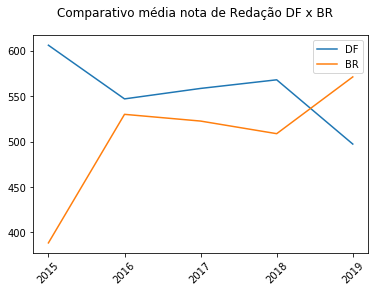

In [18]:
df_redacao = comparativo_redacao['NU_NOTA_REDACAO_DF']
br_redacao = medias_gerais['NU_NOTA_REDACAO']

fig, ax = plt.subplots()
ax.plot(anos, df_redacao, label='DF')
ax.plot(anos, br_redacao, label='BR')
ax.legend()
fig.suptitle('Comparativo média nota de Redação DF x BR')
plt.xticks(anos,[str(i) for i in anos],rotation=45)

plt.show()

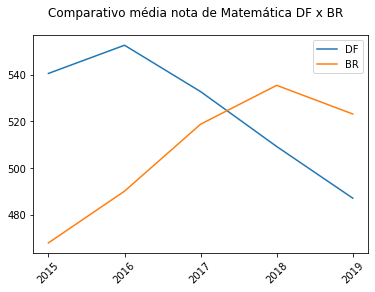

In [19]:
df_mt = comparativo_mt['NU_NOTA_MT_DF']
br_mt = medias_gerais['NU_NOTA_MT']

fig, ax = plt.subplots()
ax.plot(anos, df_mt, label='DF')
ax.plot(anos, br_mt, label='BR')
ax.legend()
fig.suptitle('Comparativo média nota de Matemática DF x BR')
plt.xticks(anos,[str(i) for i in anos],rotation=45)

plt.show()

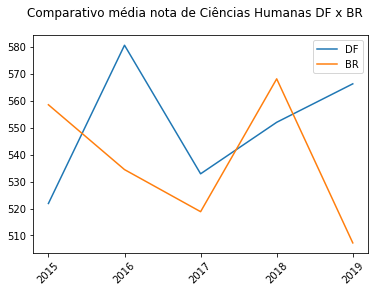

In [20]:
df_ch = comparativo_ch['NU_NOTA_CH_DF']
br_ch = medias_gerais['NU_NOTA_CH']

fig, ax = plt.subplots()
ax.plot(anos, df_ch, label='DF')
ax.plot(anos, br_ch, label='BR')
ax.legend()
fig.suptitle('Comparativo média nota de Ciências Humanas DF x BR')
plt.xticks(anos,[str(i) for i in anos],rotation=45)

plt.show()

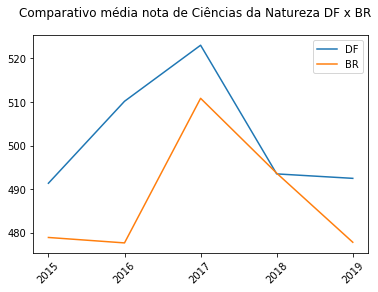

In [21]:
df_cn = comparativo_cn['NU_NOTA_CN_DF']
br_cn = medias_gerais['NU_NOTA_CN']

fig, ax = plt.subplots()
ax.plot(anos, df_cn, label='DF')
ax.plot(anos, br_cn, label='BR')
ax.legend()
fig.suptitle('Comparativo média nota de Ciências da Natureza DF x BR')
plt.xticks(anos,[str(i) for i in anos],rotation=45)

plt.show()

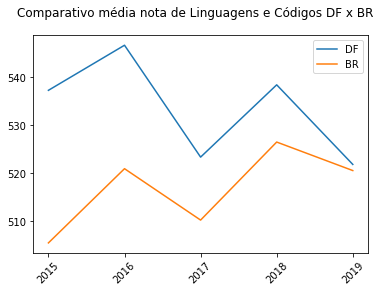

In [22]:
df_lc = comparativo_lc['NU_NOTA_LC_DF']
br_lc = medias_gerais['NU_NOTA_LC']

fig, ax = plt.subplots()
ax.plot(anos, df_lc, label='DF')
ax.plot(anos, br_lc, label='BR')
ax.legend()
fig.suptitle('Comparativo média nota de Linguagens e Códigos DF x BR')
plt.xticks(anos,[str(i) for i in anos],rotation=45)

plt.show()